In [ ]:
print("Hello Everyone :D")

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import statsmodels.formula.api as sm
import statsmodels.api as sm


Hello Everyone :D


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Group Project - Housing Prediction/houses_edited.csv"
df=pd.read_csv(path)
df.head()

,index,title,final_price,list_price,bedrooms,bathrooms,sqft,parking,description,mls,...,full_address,lat,long,city_district,mean_district_income,district_code,final_price_transformed,final_price_log,bedrooms_ag,bedrooms_bg
0,0,"1303 - 38 Grenville St, Toronto (C4461599) | Z...",855000,870000,2 + 1 beds,2,850.0,1,"Luxurious And Spacious Murano Tower. 2+1, 2 Ba...",C4461599,...,"38 Grenville St, Toronto , Ontario, Canada",43.661896,-79.385748,Bay Street Corridor,56526,76,2.391687,13.658857,2,1
1,1,"2 Cabot Crt, Toronto (W4502992) | Zoocasa",885000,898000,3 beds,2,NaN,6,Fantastic Opportunity To Live Within The Histo...,W4502992,...,"2 Cabot Crt, Toronto , Ontario, Canada",43.646982,-79.530356,Islington-City Centre West,52787,14,2.391803,13.693343,3,0
2,2,"1504 - 30 Roehampton Ave, Toronto (C4511330) |...",550000,549900,1 beds,1,550.0,0,Bright Sunfilled Spacious 1 Bdr Unit; Floor To...,C4511330,...,"30 Roehampton Ave, Toronto , Ontario, Canada",43.708472,-79.397498,Mount Pleasant West,57039,104,2.390053,13.217674,1,0
3,3,"514 - 65 East Liberty St, Toronto (C4515763) |...",665000,600000,1 + 1 beds,1,650.0,1,Rare Loft-Like Condo In Liberty Village W/ 18'...,C4515763,...,"65 East Liberty St, Toronto , Ontario, Canada",43.638399,-79.414448,Niagara,70623,82,2.390793,13.407542,1,1
4,4,"61 Twelfth St, Toronto (W4519375) | Zoocasa",825513,839000,2 beds,2,NaN,1,Location! Location! Location. Your Cottage In ...,W4519375,...,"61 Twelfth St, Toronto , Ontario, Canada",43.597096,-79.509612,New Toronto,44101,18,2.391568,13.623760,2,0


In [ ]:
df.shape

(15234, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15234 entries, 0 to 15233
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    15234 non-null  int64  
 1   title                    15234 non-null  object 
 2   final_price              15234 non-null  int64  
 3   list_price               15234 non-null  int64  
 4   bedrooms                 15234 non-null  object 
 5   bathrooms                15234 non-null  int64  
 6   sqft                     10713 non-null  float64
 7   parking                  15234 non-null  int64  
 8   description              15185 non-null  object 
 9   mls                      15234 non-null  object 
 10  type                     15234 non-null  object 
 11  full_link                15234 non-null  object 
 12  full_address             15234 non-null  object 
 13  lat                      15234 non-null  float64
 14  long                  

In [ ]:
df.describe()

,index,final_price,list_price,bathrooms,sqft,parking,lat,long,mean_district_income,district_code,final_price_transformed,final_price_log,bedrooms_ag,bedrooms_bg
count,15234.000000,1.523400e+04,1.523400e+04,15234.000000,10713.000000,15234.000000,15234.000000,15234.000000,15234.000000,15234.000000,15234.000000,15234.000000,15234.000000,15234.000000
mean,9519.960943,8.827136e+05,8.750930e+05,2.122227,1116.469336,1.559144,43.702658,-79.394666,56065.642576,71.300643,2.391101,13.542090,2.335500,0.539583
std,4882.263253,6.189336e+05,6.358072e+05,1.128122,691.331305,1.345642,0.056806,0.095425,32547.705435,38.673608,0.001729,0.507854,1.136062,0.667572
min,0.000000,1.030000e+05,1.049000e+05,1.000000,250.000000,0.000000,43.588176,-79.621693,25989.000000,1.000000,2.380227,11.542484,0.000000,0.000000
25%,5677.500000,5.350000e+05,5.290000e+05,1.000000,650.000000,1.000000,43.652058,-79.454611,34904.000000,39.000000,2.389940,13.190022,1.000000,0.000000
50%,9803.500000,7.150000e+05,6.999000e+05,2.000000,900.000000,1.000000,43.690963,-79.395589,50580.000000,76.000000,2.391061,13.480038,2.000000,0.000000
75%,13667.750000,9.890000e+05,9.699000e+05,3.000000,1300.000000,2.000000,43.755905,-79.335266,67757.000000,101.000000,2.392164,13.804450,3.000000,1.000000
max,17543.000000,1.318000e+07,1.318000e+07,14.000000,4374.000000,11.000000,43.839372,-79.124094,308010.000000,140.000000,2.397194,16.394211,9.000000,6.000000


In [ ]:
# Data Cleaning
# Checking null values
df.isnull().sum()*100/df.shape[0]

index                       0.000000
title                       0.000000
final_price                 0.000000
list_price                  0.000000
bedrooms                    0.000000
bathrooms                   0.000000
sqft                       29.677038
parking                     0.000000
description                 0.321649
mls                         0.000000
type                        0.000000
full_link                   0.000000
full_address                0.000000
lat                         0.000000
long                        0.000000
city_district               0.000000
mean_district_income        0.000000
district_code               0.000000
final_price_transformed     0.000000
final_price_log             0.000000
bedrooms_ag                 0.000000
bedrooms_bg                 0.000000
dtype: float64

In [ ]:
# Create dummy columns for categorical variables
needed_columns = ['sqft', 'parking' , 'mean_district_income', 'bedrooms_ag', 'bedrooms_bg', 'type', 'final_price']

df_dummies = pd.get_dummies(df[needed_columns])
predictors = df_dummies.drop('final_price', axis=1).columns
df_dummies.head(5)

,sqft,parking,mean_district_income,bedrooms_ag,bedrooms_bg,final_price,type_Att/Row/Twnhouse,type_Co-Op Apt,type_Co-Ownership Apt,type_Comm Element Condo,type_Condo Apt,type_Condo Townhouse,type_Detached,type_Link,type_Plex,type_Semi-Detached,type_Store W/Apt/Offc
0,850.0,1,56526,2,1,855000,0,0,0,0,1,0,0,0,0,0,0
1,NaN,6,52787,3,0,885000,0,0,0,0,0,0,0,0,0,1,0
2,550.0,0,57039,1,0,550000,0,0,0,0,1,0,0,0,0,0,0
3,650.0,1,70623,1,1,665000,0,0,0,0,1,0,0,0,0,0,0
4,NaN,1,44101,2,0,825513,0,0,0,0,0,0,1,0,0,0,0


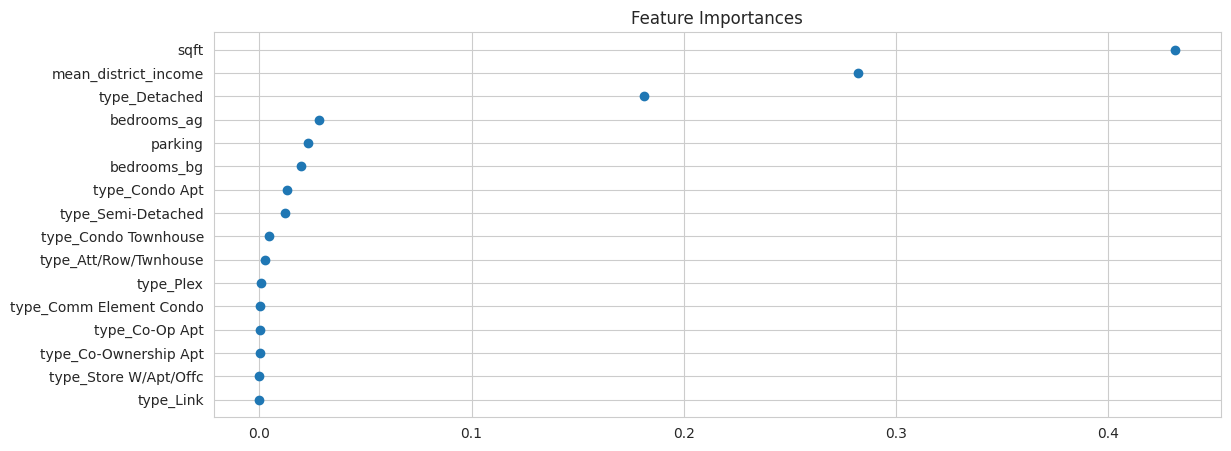

In [ ]:
# To determine which features are most significant for our analysis and which values require imputing, 
# we’ll need to construct a feature importance matrix and plot it with Matplotlib. 
# To assess feature importance, we’ll employ this technique: Tree Repressor.

from sklearn.ensemble import ExtraTreesRegressor

sns.set_style("whitegrid")
plt.figure(figsize=[13,5])
df_check = df_dummies.dropna(subset=['sqft'])
model = ExtraTreesRegressor(n_estimators=10)
model.fit(df_check[predictors], df_check.final_price)
# display the relative importance of each attribute

sorted_feature_importance = sorted(zip(model.feature_importances_, df_check[predictors].columns))

x = [a[0] for a in sorted_feature_importance]
y = [a[1] for a in sorted_feature_importance]

plt.scatter(x,y)
plt.title('Feature Importances')
plt.show()

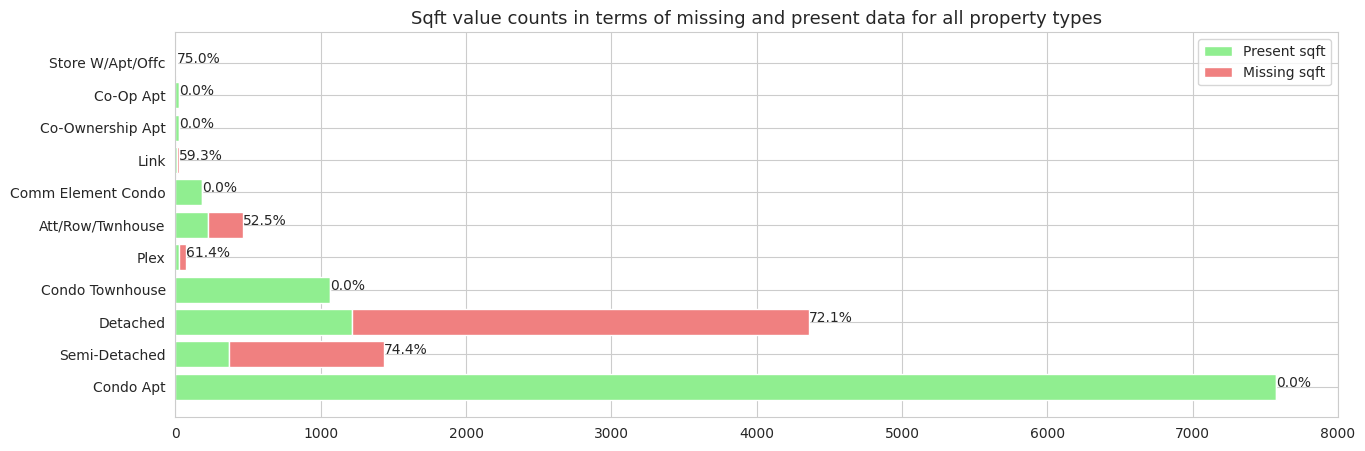

In [ ]:
# It appears that one of the most valuable feature is sqft. Since we’re missing some of this data we created a value count
# for present and missing sqft feature observations.
house_type_notna, house_type_na = [], []

houses_types = pd.unique(df.type)

for house_type in houses_types:
    house_type_notna.append(sum((df.type == house_type) & (pd.notna(df.sqft))))
    house_type_na.append(sum((df.type == house_type) & (pd.isna(df.sqft))))

ind = np.arange(houses_types.shape[0])

plt.figure(figsize=[15,5])

width = 0.5
p1 = plt.barh(ind, house_type_notna, color='lightgreen')
p2 = plt.barh(ind, house_type_na, left=house_type_notna, color='lightcoral')

for no in ind:
    percent_missing = np.round((house_type_na[no] / (house_type_notna[no] + house_type_na[no]))*100, 1)
    plt.text(house_type_notna[no] + house_type_na[no], ind[no], str(percent_missing) + '%')


plt.xlim([0,8000])
plt.legend(['Present sqft', 'Missing sqft'])
plt.yticks(ind, houses_types)
plt.title('Sqft value counts in terms of missing and present data for all property types', fontsize=13)
plt.show()

In [ ]:
# A majority of detached and semi-detached houses lack square footage. The number of "Missing sqft" is quite high 
# for some other types as well.  Hence imputing this data takes precedence.

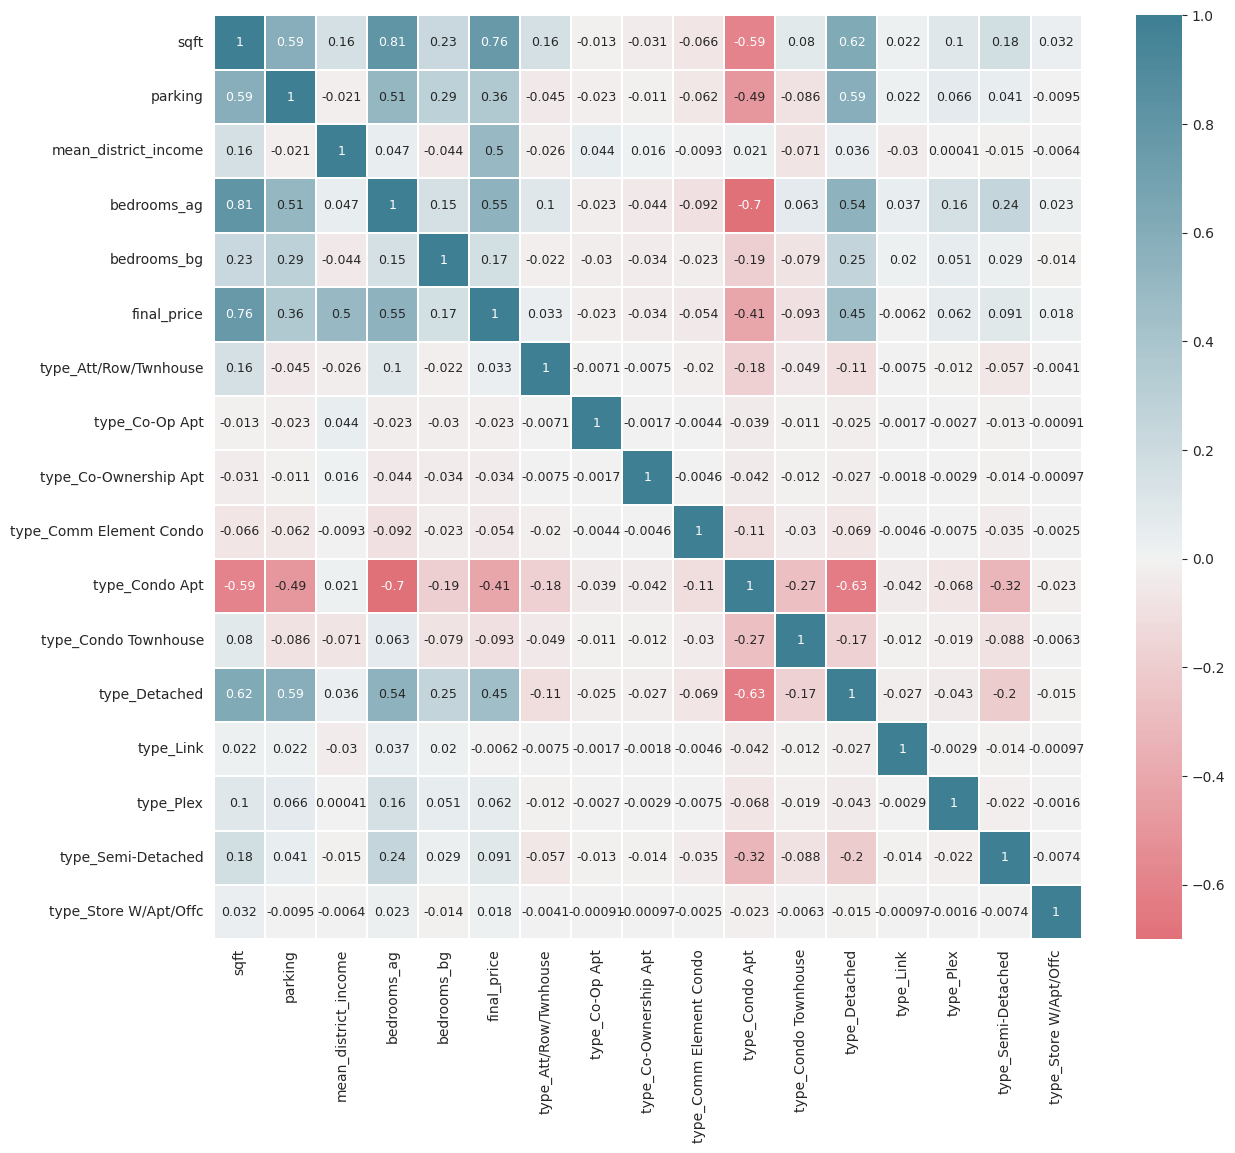

In [ ]:
# Create features Heatmap to see how features are correlated with final_price (i.e. our response variable)

def features_heatmap(df, center = None):
    fig, ax = plt.subplots(figsize = [14,12])
    colormap = sns.diverging_palette(10, 220, as_cmap=True)
    fig = sns.heatmap(df.corr(),
                cmap = colormap,
               center = center,
                annot = True,
                linewidths = 0.1,
                annot_kws={'fontsize':9})
    
    
features_heatmap(df_dummies, center=0)

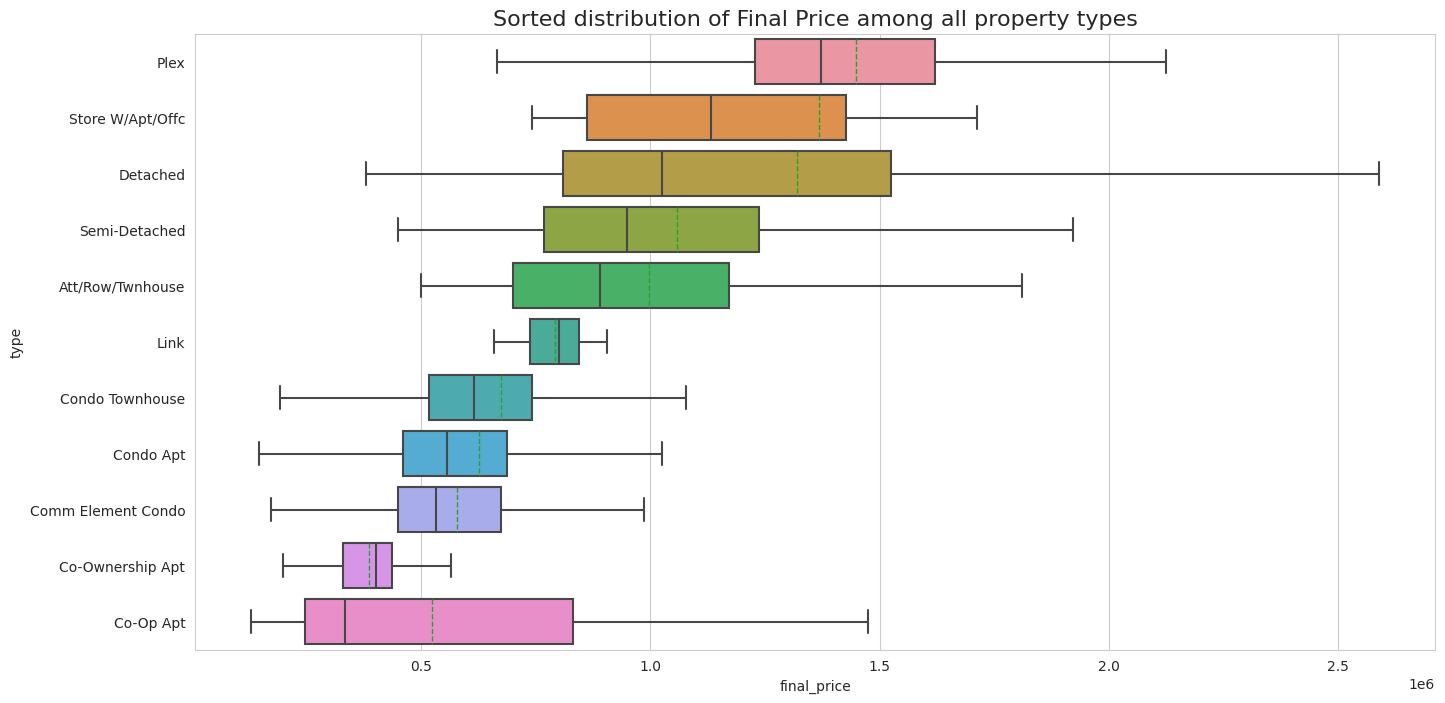

In [ ]:
sns.set_style("whitegrid")
plt.subplots(figsize=[16,8])
sorted_medians = sorted([(df[df.type==st].final_price.median(), st) for st in houses_types], reverse=True)
sns.boxplot(y = 'type', x = 'final_price', data = df, orient='h', showfliers=False, meanline =True, showmeans=True, 
            order=[b for a,b in sorted_medians])
plt.title('Sorted distribution of Final Price among all property types', fontsize=16)
plt.show()

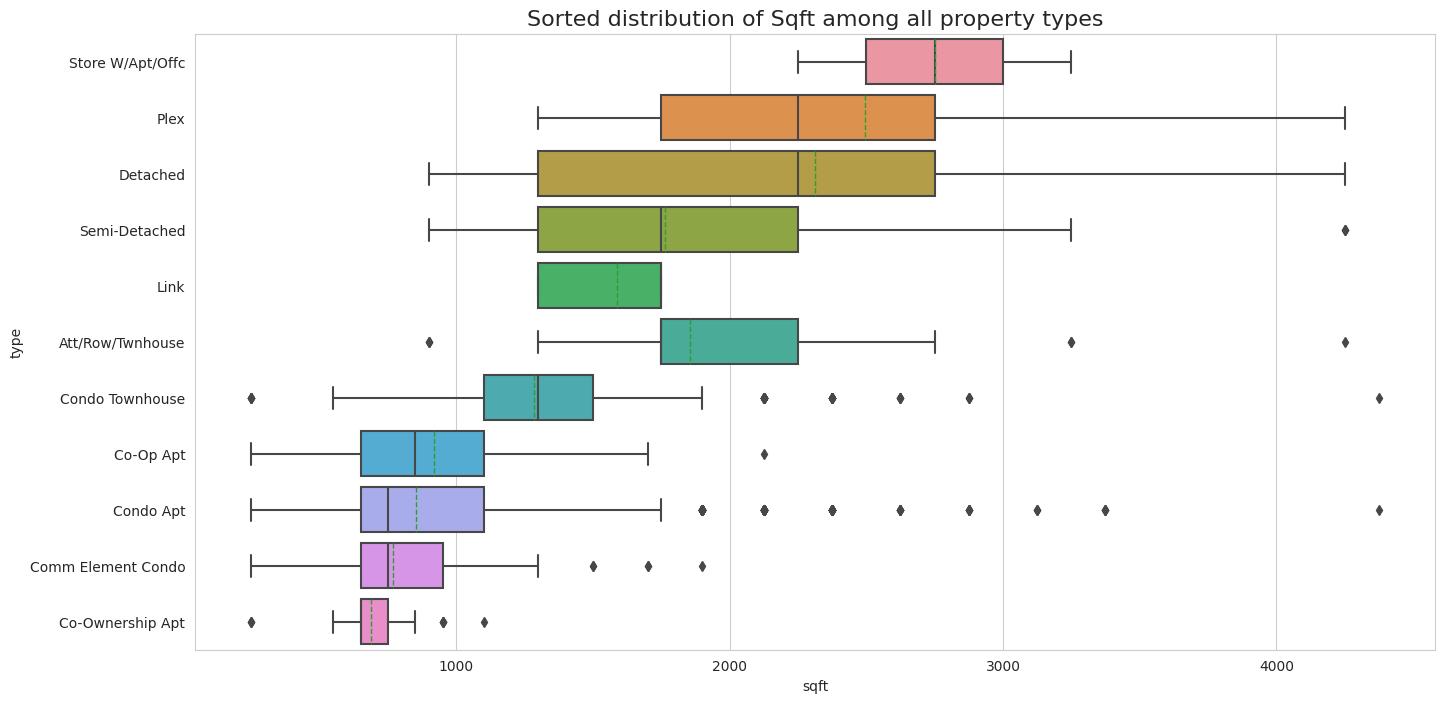

In [ ]:
plt.subplots(figsize=[16,8])
sorted_medians = sorted([(df[df.type==st].sqft.median(), st) for st in houses_types], reverse=True)
sns.boxplot(y = 'type', x = 'sqft', data = df, orient='h', showfliers=True, meanline =True, showmeans=True,
           order=[b for a,b in sorted_medians])
plt.title('Sorted distribution of Sqft among all property types', fontsize=16)
plt.show()

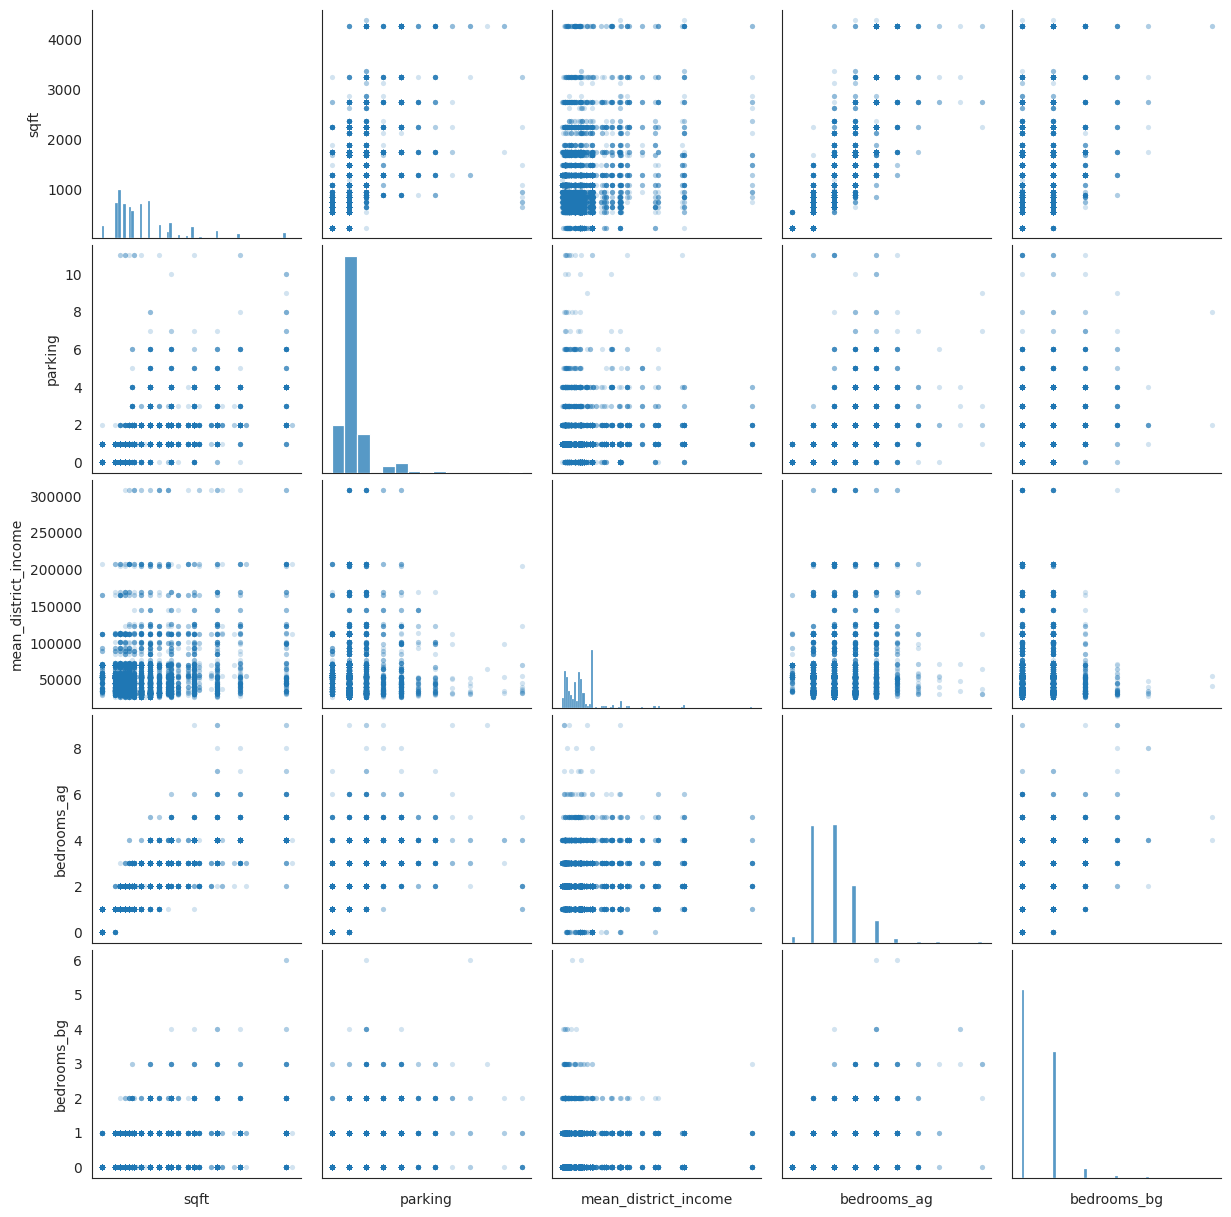

In [ ]:
# Plot pairwise relationships
sns.set_style("white")
pp = sns.pairplot(df_dummies[pd.notna(df_dummies.sqft)][predictors[:5]], diag_kind = 'hist', plot_kws=dict(s=14, alpha=.2, linewidth=0))
pp.set(xticklabels=[])
plt.show()

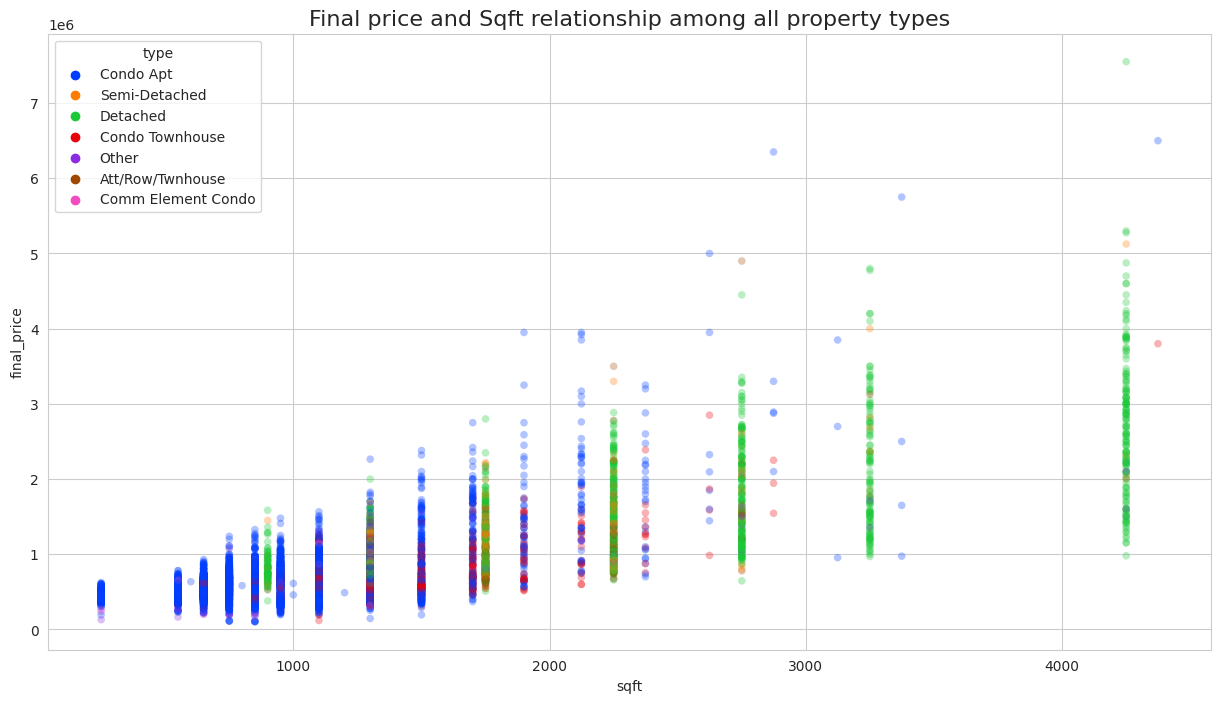

In [ ]:
# Check how final_price and sqft are related to each other among all property types
sns.set_style("whitegrid")
plt.figure(figsize=[15,8])
sns.scatterplot(x='sqft', y='final_price' ,data=df, 
                hue = df.type.replace({                   
                    'Plex': 'Other',
                    'Link': 'Other',
                    'Co-Ownership Apt': 'Other',
                    'Co-Op Apt': 'Other',
                    'Store W/Apt/Offc': 'Other'}),
                    linewidth=0, alpha=0.3, palette='bright', s=30)
plt.title('Final price and Sqft relationship among all property types', fontsize=16)
plt.show()

In [ ]:
# "sqft" has around 30% null values. We will need to check if it's an important variable and decide treatment 
# of NaN's accordingly.

In [ ]:
# We will use Random Forest Model to predict the column "sqft"
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

#Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# First, we will creat the model
df1 = df[['sqft','mean_district_income','district_code','final_price_transformed','final_price_log','bedrooms_ag','bedrooms_bg']]
df1.head()

,sqft,mean_district_income,district_code,final_price_transformed,final_price_log,bedrooms_ag,bedrooms_bg
0,850.0,56526,76,2.391687,13.658857,2,1
1,NaN,52787,14,2.391803,13.693343,3,0
2,550.0,57039,104,2.390053,13.217674,1,0
3,650.0,70623,82,2.390793,13.407542,1,1
4,NaN,44101,18,2.391568,13.623760,2,0


In [ ]:
df2 = df1.dropna()
df2.head()

,sqft,mean_district_income,district_code,final_price_transformed,final_price_log,bedrooms_ag,bedrooms_bg
0,850.0,56526,76,2.391687,13.658857,2,1
2,550.0,57039,104,2.390053,13.217674,1,0
3,650.0,70623,82,2.390793,13.407542,1,1
5,250.0,44101,18,2.388279,12.815838,0,0
6,2750.0,169203,103,2.394769,14.808762,4,0


In [ ]:
X = df2.iloc[:,1:]
y = df2[['sqft']].astype('float')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Random Forest Model
rfc = RandomForestClassifier()
rfc.fit(X_train,np.ravel(y_train))

y_ = rfc.predict(X_test)
print('test accuracy for decision tree classifier:', \
      round(accuracy_score(y_test, y_)*100, 2),'%')

test accuracy for decision tree classifier: 44.0 %


In [ ]:
# Hypertuning the Random Forest Model
# Hi friends, do not run this cell if you don't have to, it takes about 7 mins to run.
# Instead, I already have the hyperparameters written down, just plug this into the next line where it says **grid_search.best_params_
# RandomForestClassifier(max_depth=50, min_samples_leaf=5, n_estimators=200,n_jobs=-1)
param_grid = {
    'n_estimators': [20, 50, 100, 200],
    'max_depth':[5, 10, 50, 100, 200],
    'criterion':['gini','entropy'],
    'min_samples_leaf': [5, 20, 50 , 100]
}
rfc_tuned = RandomForestClassifier(n_jobs=-1)
grid_search = GridSearchCV(estimator=rfc_tuned, 
               param_grid=param_grid,
               n_jobs=-1,
               cv=5)
grid_search.fit(X_train,np.ravel(y_train))
print(grid_search.best_params_)
print("\n",grid_search.best_estimator_)

{'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 5, 'n_estimators': 200}

 RandomForestClassifier(max_depth=50, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1)


In [ ]:
rfc_tuned = RandomForestClassifier(max_depth=100, min_samples_leaf=5, n_estimators=100,n_jobs=-1)
#rfc_tuned = RandomForestClassifier(**grid_search.best_params_)
rfc_tuned.fit(X_train,np.ravel(y_train))
print(rfc_tuned.score(X_train,y_train))
print(rfc_tuned.score(X_test,y_test))
print('--------------------------')
print(rfc_tuned.predict(X_test[0:5]))
print(y_test.iloc[0:5,0])

0.662777129521587
0.45870275314979003
--------------------------
[ 650. 1300. 1100. 1300. 1100.]
13354     650.0
2354     1300.0
3448      950.0
11510    1750.0
10306     950.0
Name: sqft, dtype: float64


In [ ]:
# Since we have a hypertuned model now, we will fill in the NaN values

df3 = df1[df1['sqft'].isnull()]
df3.head()

,sqft,mean_district_income,district_code,final_price_transformed,final_price_log,bedrooms_ag,bedrooms_bg
1,NaN,52787,14,2.391803,13.693343,3,0
4,NaN,44101,18,2.391568,13.623760,2,0
10,NaN,49709,90,2.392372,13.870945,3,1
16,NaN,28085,130,2.391460,13.592367,4,1
18,NaN,33323,136,2.389742,13.142166,2,3


In [ ]:
# Predict NaN values
X_nan = df3.iloc[:,1:]
pre_nan = rfc_tuned.predict(X_nan)

In [ ]:
# Fill df function
df.loc[df['sqft'].isnull(), 'sqft'] = pre_nan

In [ ]:
# Filled df display
df.head()

,index,title,final_price,list_price,bedrooms,bathrooms,sqft,parking,description,mls,...,full_address,lat,long,city_district,mean_district_income,district_code,final_price_transformed,final_price_log,bedrooms_ag,bedrooms_bg
0,0,"1303 - 38 Grenville St, Toronto (C4461599) | Z...",855000,870000,2 + 1 beds,2,850.0,1,"Luxurious And Spacious Murano Tower. 2+1, 2 Ba...",C4461599,...,"38 Grenville St, Toronto , Ontario, Canada",43.661896,-79.385748,Bay Street Corridor,56526,76,2.391687,13.658857,2,1
1,1,"2 Cabot Crt, Toronto (W4502992) | Zoocasa",885000,898000,3 beds,2,1300.0,6,Fantastic Opportunity To Live Within The Histo...,W4502992,...,"2 Cabot Crt, Toronto , Ontario, Canada",43.646982,-79.530356,Islington-City Centre West,52787,14,2.391803,13.693343,3,0
2,2,"1504 - 30 Roehampton Ave, Toronto (C4511330) |...",550000,549900,1 beds,1,550.0,0,Bright Sunfilled Spacious 1 Bdr Unit; Floor To...,C4511330,...,"30 Roehampton Ave, Toronto , Ontario, Canada",43.708472,-79.397498,Mount Pleasant West,57039,104,2.390053,13.217674,1,0
3,3,"514 - 65 East Liberty St, Toronto (C4515763) |...",665000,600000,1 + 1 beds,1,650.0,1,Rare Loft-Like Condo In Liberty Village W/ 18'...,C4515763,...,"65 East Liberty St, Toronto , Ontario, Canada",43.638399,-79.414448,Niagara,70623,82,2.390793,13.407542,1,1
4,4,"61 Twelfth St, Toronto (W4519375) | Zoocasa",825513,839000,2 beds,2,1300.0,1,Location! Location! Location. Your Cottage In ...,W4519375,...,"61 Twelfth St, Toronto , Ontario, Canada",43.597096,-79.509612,New Toronto,44101,18,2.391568,13.623760,2,0


In [ ]:
df.drop(['title','description','full_address','bedrooms','mls','type','full_link','lat','long','city_district','district_code','final_price_transformed'], axis = 1, inplace = True)

In [ ]:
from sklearn.model_selection import train_test_split

# Set the training data
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
df_train.head()

,index,final_price,list_price,bathrooms,sqft,parking,mean_district_income,final_price_log,bedrooms_ag,bedrooms_bg
7470,9655,510000,519000,1,250.0,1,53583,13.142166,1,0
12192,14454,615000,625000,2,1100.0,2,34904,13.329378,2,0
15053,17360,812000,825000,3,1300.0,7,47002,13.607256,3,3
12722,14991,775000,799900,2,1100.0,1,40588,13.560618,2,0
9883,12110,572000,595000,1,750.0,1,45326,13.256894,1,1


In [ ]:
y_train = df_train.pop('final_price_log')
X_train = df_train

In [ ]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
# Running RFE 
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
rfe = RFE(lm, n_features_to_select = 6)      
rfe = rfe.fit(X_train, y_train)

In [ ]:
# shows that which features are selected by the RFE algorithm
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('index', False, 2),
 ('final_price', False, 3),
 ('list_price', False, 4),
 ('bathrooms', True, 1),
 ('sqft', True, 1),
 ('parking', True, 1),
 ('mean_district_income', True, 1),
 ('bedrooms_ag', True, 1),
 ('bedrooms_bg', True, 1)]

In [ ]:
col = X_train.columns[rfe.support_]
col

Index(['bathrooms', 'sqft', 'parking', 'mean_district_income', 'bedrooms_ag',
       'bedrooms_bg'],
      dtype='object')

In [ ]:
X_train.columns[~rfe.support_]

Index(['index', 'final_price', 'list_price'], dtype='object')

In [ ]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [ ]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [ ]:
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.params

const                   12.540126
bathrooms                0.064810
sqft                     0.000316
parking                  0.011466
mean_district_income     0.000005
bedrooms_ag              0.051561
bedrooms_bg              0.026966
dtype: float64

In [ ]:
# get the OLS summary table
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:        final_price_log   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     4372.
Date:                Mon, 10 Apr 2023   Prob (F-statistic):               0.00
Time:                        19:17:42   Log-Likelihood:                -1315.4
No. Observations:               10663   AIC:                             2645.
Df Residuals:                   10656   BIC:                             2696.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.5401 

In [ ]:
## Validation of Linear Model

There are seven features in total which are:
bathroom, sqft, parking, mean district income, district code, bedroom ag, bedroom bg

All of the features are able to meet the requirements for linear regression

In [ ]:
from scipy import stats
import statsmodels.formula.api as sm
from statsmodels.graphics.regressionplots import plot_regress_exog, plot_fit, plot_leverage_resid2, influence_plot
from statsmodels.tools.eval_measures import rmse
import statsmodels.formula.api as smf
import statsmodels.tools as smt

In [ ]:
features = [df.columns[[3,4,5,6,7,10,11]]]

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


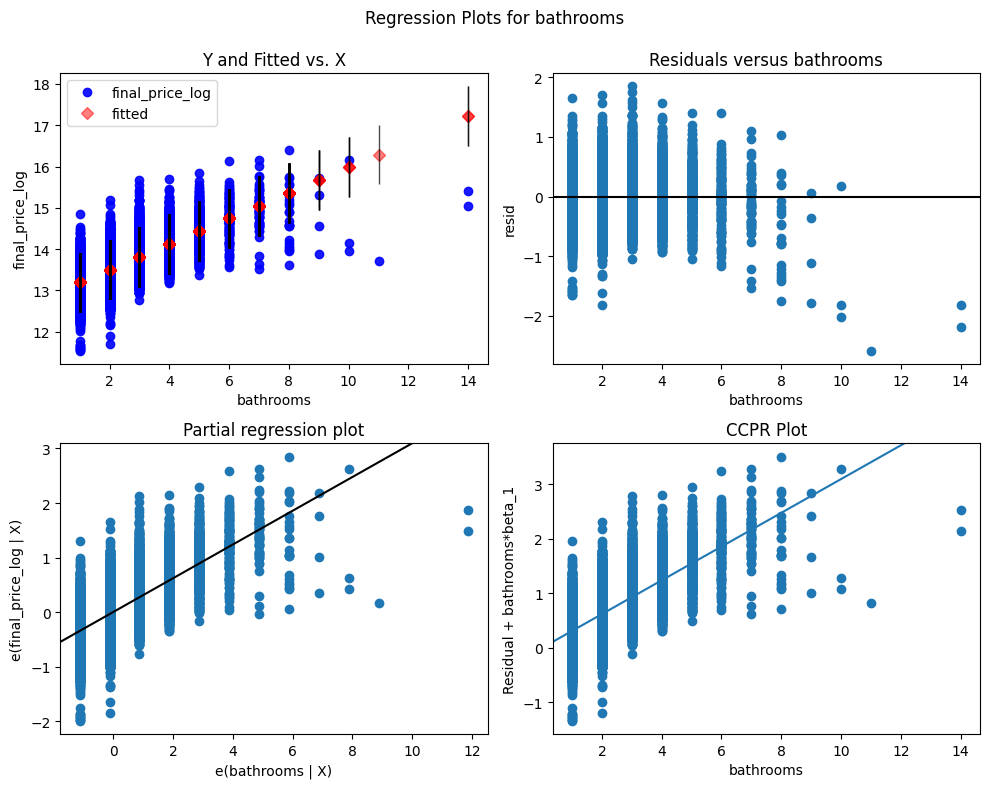

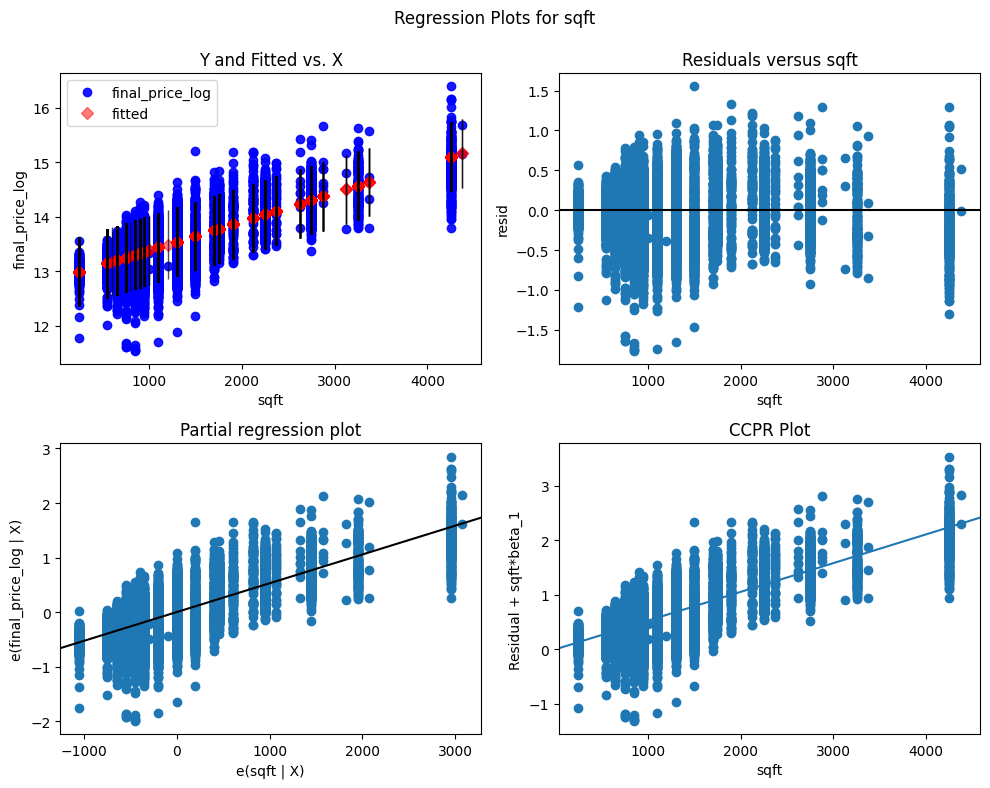

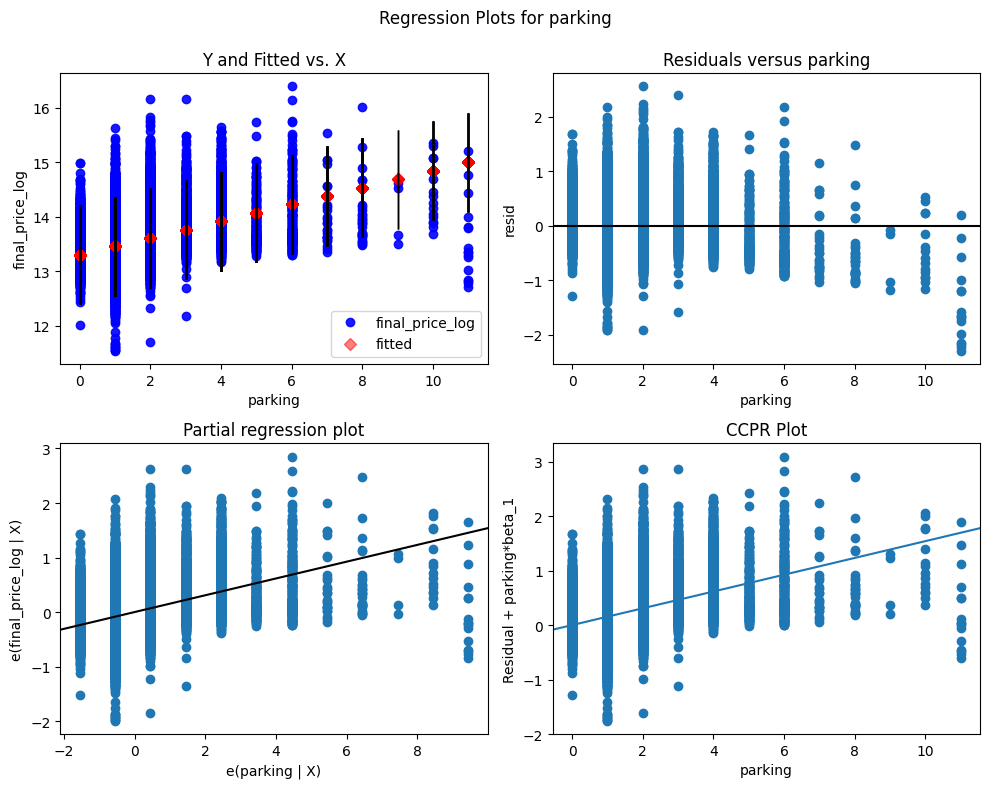

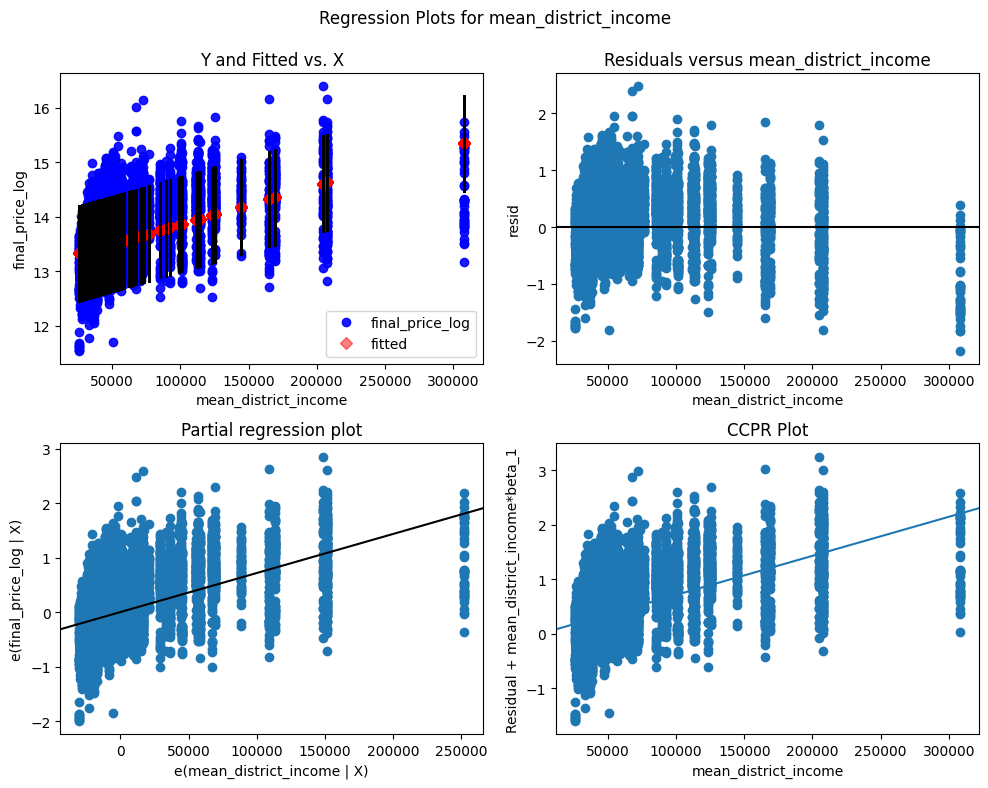

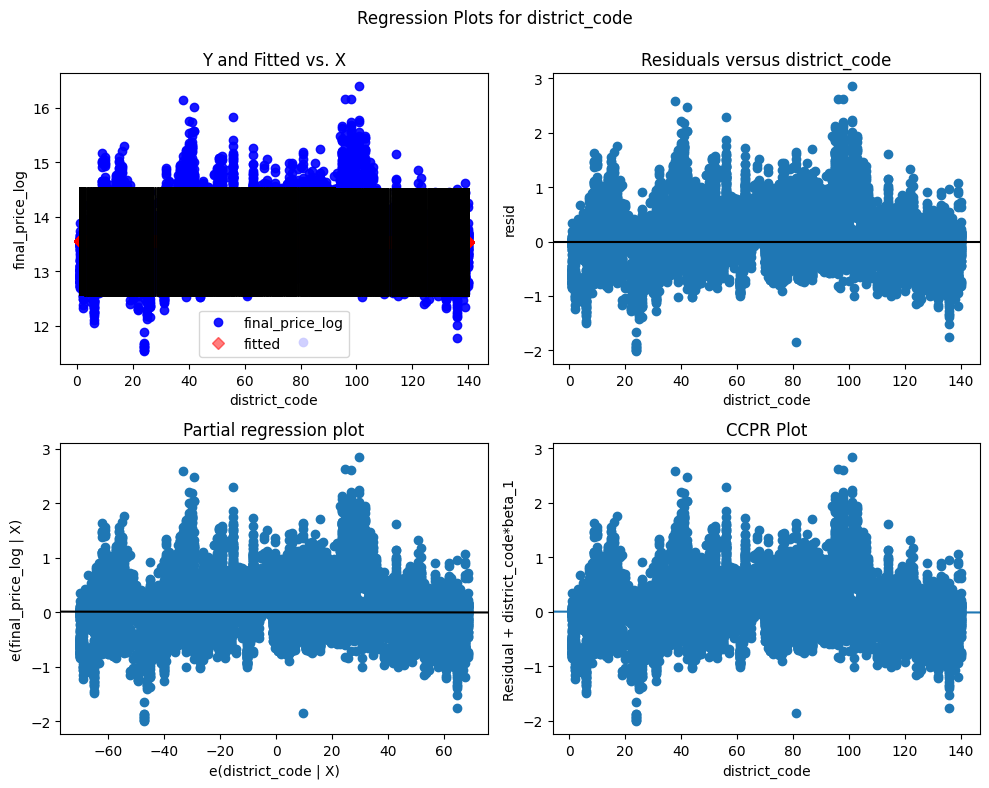

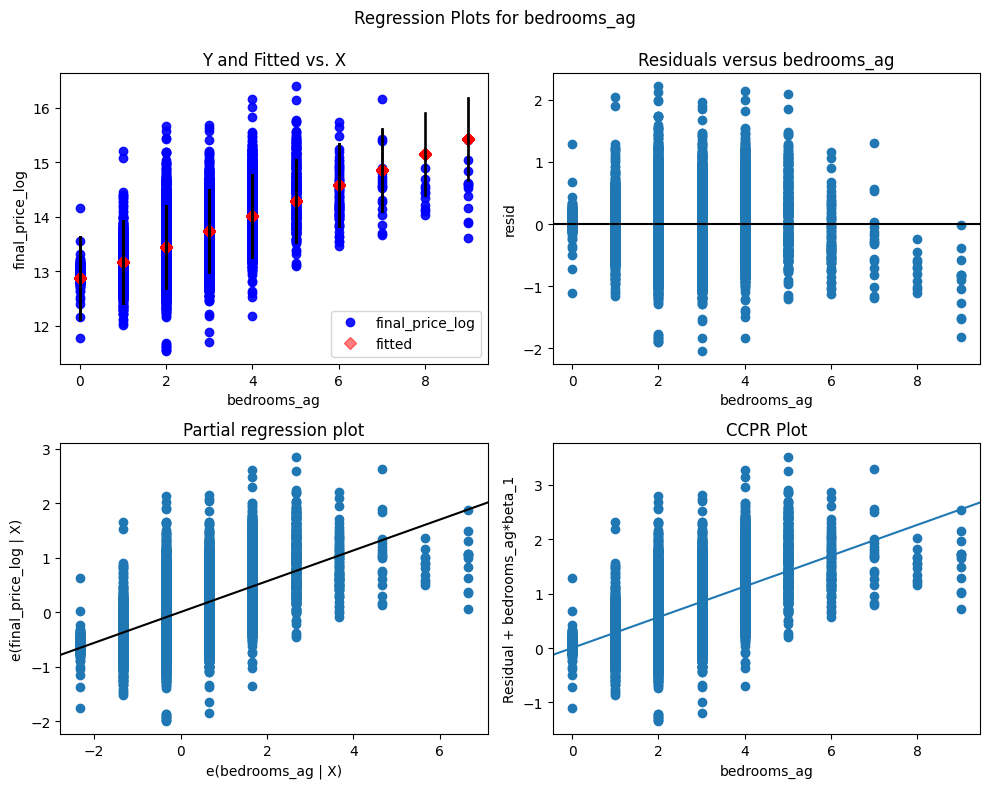

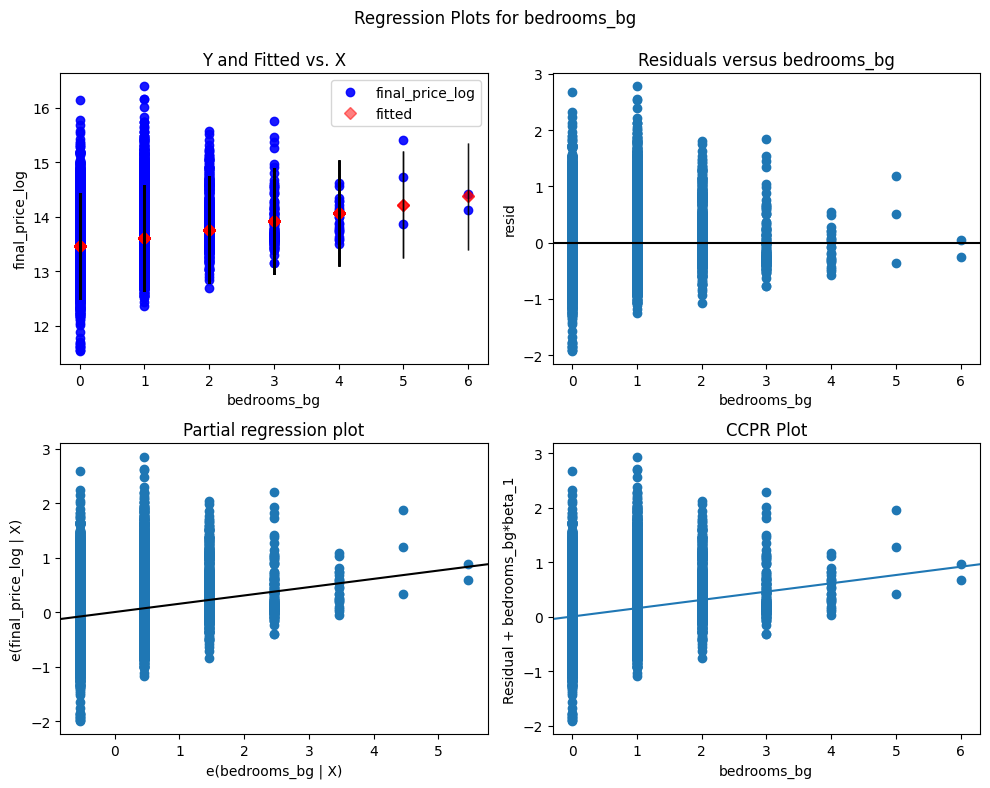

In [ ]:
for i, feature in enumerate(features[0]):
    model = sm.ols(f'final_price_log~{feature}',data=df)
    results = model.fit()
    fig = plt.figure(figsize=(10,8))
    fig = plot_regress_exog(results, feature, fig = fig)


In [ ]:
# Predicted housing price

In [ ]:
# Predicted values for the training data
y_train_pred = lm.predict(X_train_rfe)
y_train_pred

7470     13.033689
12192    13.330248
15053    13.712797
12722    13.349195
9883     13.174514
           ...    
12119    13.796861
8039     13.472080
14147    13.379322
6936     13.266674
5640     13.559036
Length: 10663, dtype: float64

In [ ]:
y_test = df_test.pop('final_price_log')
X_test = df_test

In [ ]:
X_test = sm.add_constant(X_test)

In [ ]:
X_test_rfe = X_test[X_train_rfe.columns]

In [ ]:
# Predicted values for the test dataset
y_pred= lm.predict(X_test_rfe)
y_pred

985      14.222024
9558     13.615754
10645    13.063319
2181     13.764576
13649    13.803876
           ...    
13186    13.286013
10845    13.262961
66       13.274964
6102     13.603577
8965     13.612096
Length: 4571, dtype: float64

In [ ]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.6943956337241474

Text(0, 0.5, 'y_pred')

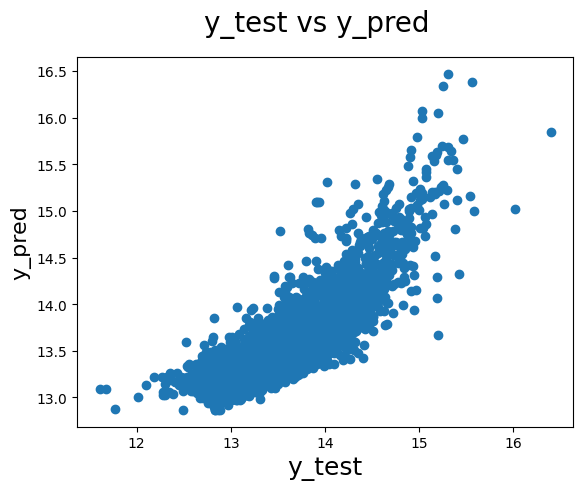

In [ ]:
# Plotting y_test and y_pred
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)

In [ ]:
# In conclusion, there are 4 main features that we can use for predicting the house price which are
# bathrooms, sqft, parking, bedrooms (bedrooms_ag and bedrooms_bg)
# the equation of the best fitted line is
# Price = 12.5401 + 0.057 * bathrooms + 0.0003 * sqft + 0.0119 * parking + 0.0502 * bedrooms_ag + 0.0258 * bedrooms_bg